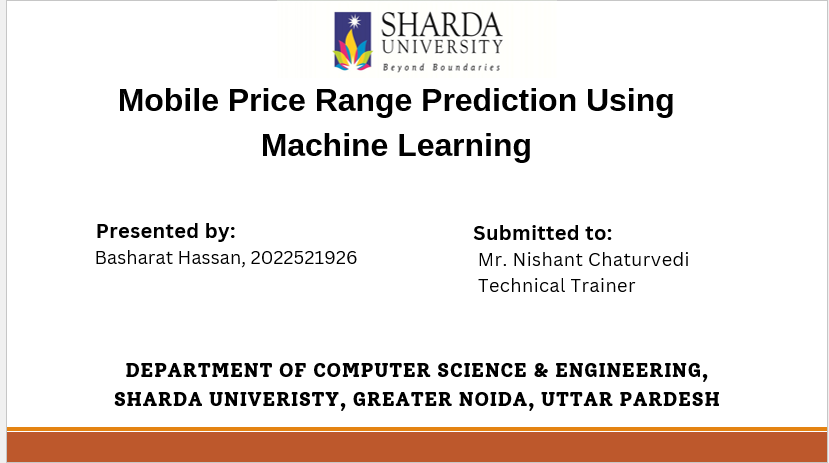

# Problem Statement
In today’s competitive smartphone market, pricing a mobile device appropriately is crucial for manufacturers to attract customers and maintain profitability. With numerous specifications influencing a phone’s price—such as RAM, battery capacity, screen resolution, and connectivity features—there is a need for a data-driven approach to predict price categories based on these attributes.

# Objective
The objective of this project is to build a classification model that predicts the price range of a mobile phone based on its specifications. By analyzing and modeling the dataset, we aim to:

Understand how different features influence the pricing category of smartphones.

Perform exploratory data analysis (EDA) to extract insights and identify patterns.

Build and evaluate classification models to accurately predict price categories.

Optimize model performance through hyperparameter tuning.

The final output will be a predictive system that categorizes phones into predefined price ranges based on their features.

# Data Description
The dataset contains technical specifications of mobile phones along with a target variable price_range. The features include:

Features and their description
* battery_power	Total energy capacity of the battery (mAh)
* blue	Bluetooth support (0 = No, 1 = Yes)
* clock_speed	Speed at which the microprocessor executes instructions (GHz)
* dual_sim	Dual SIM support (0 = No, 1 = Yes)
* fc	Front camera megapixels
* four_g	4G support (0 = No, 1 = Yes)
* int_memory	Internal memory (GB)
* m_dep	Mobile depth (cm)
* mobile_wt	Weight of mobile phone (grams)
* n_cores	Number of processor cores
* pc	Primary camera megapixels
* px_height	Pixel resolution height
* px_width	Pixel resolution width
* ram	RAM in megabytes (MB)
* sc_h	Screen height (cm)
* sc_w	Screen width (cm)
* talk_time	Longest time a single battery charge will last when on call (hours)
* three_g	3G support (0 = No, 1 = Yes)
* touch_screen	Touch screen support (0 = No, 1 = Yes)
* wifi	WiFi support (0 = No, 1 = Yes)
* price_range	Target variable (0 = Low Cost, 1 = Medium Cost, 2 = High Cost, 3 = Very High Cost)

# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration and Cleaning

## Task 1: Load the dataset into a pandas DataFrame and display the first few rows.

In [2]:
df = pd.read_csv('mobile_data.csv')

In [3]:
print("First 5 Rows:")
df.head()

First 5 Rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print("Last 5 Rows:")
df.tail()

Last 5 Rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (2000, 21)


In [6]:
print("Data Types of Each Feature:")
print(df.dtypes)

Data Types of Each Feature:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


### Observations
There are only numeric values in each column

In [7]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  

### Observations
there are no null values in any column

## Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.).


In [8]:
print("Statistical Summary of Target Feature:")
print(df['price_range'].describe())

Statistical Summary of Target Feature:
count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64


### Observations
* The count of price rance is 200
* The max is 3

In [10]:
print("Unique Values in Target Feature:")
print(df["price_range"].unique())
print(df['price_range'].value_counts())

Unique Values in Target Feature:
[1 2 3 0]
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


### Observations
 There are 3 unique values in the price_range column: 1,2,3,0

In [34]:
correlations = df.corr()['price_range'].sort_values(ascending=False)
print("Correlation of Features with Target (price_range):")
print(correlations)

Correlation of Features with Target (price_range):
price_range      1.000000
ram              0.917046
battery_power    0.200723
pixel_area       0.176239
ppi_per_wt       0.169395
px_width         0.165818
px_height        0.148852
int_memory       0.044435
screen_area      0.041248
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


### Observations
This shows that the most columns are moderaltey correlated with price_range but ram is very strongly correlated

In [12]:
print("Statistical Summary of Dataset:")
df.describe()

Statistical Summary of Dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Observations
Here the mean for price_range in dataset is 1.5

## Task 3: Identify and handle missing values. Explain the chosen method for handling them.

In [13]:
print("Null Values in Dataset:")
print(df.isnull().sum())

Null Values in Dataset:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


### Observations
There are no null values in the dataset

## Task 4: Identify and handle duplicate rows if any.

In [14]:
duplicate_rows = df[df.duplicated()]
print(f"Duplicate Rows Found: {len(duplicate_rows)}")

Duplicate Rows Found: 0


### Observations
There are no duplicate rows in the dataset

## - Task 5: Convert categorical variables to numerical values using appropriate encoding techniques (e.g., one-hot encoding, label encoding).

In [36]:
print("\nData types:")
print(df.dtypes)


Data types:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height        float64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
pixel_area       float64
screen_area        int64
ppi_per_wt       float64
dtype: object


### Observations
There are only numeric columns in the dataset

In [15]:
for column in df.columns:
    print(f"Unique values in '{column}': {df[column].unique()}\n")
print((df < 0).sum())


Unique values in 'battery_power': [ 842 1021  563 ... 1139 1467  858]

Unique values in 'blue': [0 1]

Unique values in 'clock_speed': [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

Unique values in 'dual_sim': [0 1]

Unique values in 'fc': [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

Unique values in 'four_g': [0 1]

Unique values in 'int_memory': [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

Unique values in 'm_dep': [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Unique values in 'mobile_wt': [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 1

### Observations
* For each column of the dataset which is Numeric there are no wrong entries or anomalies present.

# Cleaning the dataset

### Checking for outliers and cap them

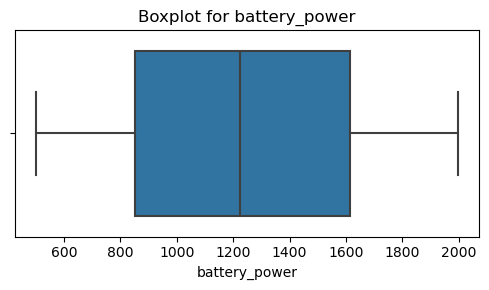

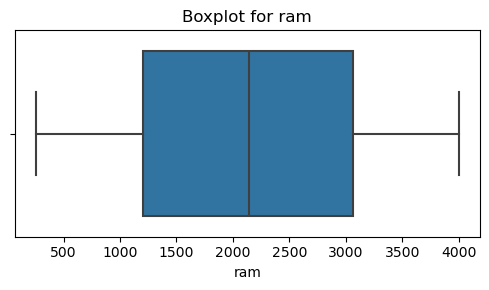

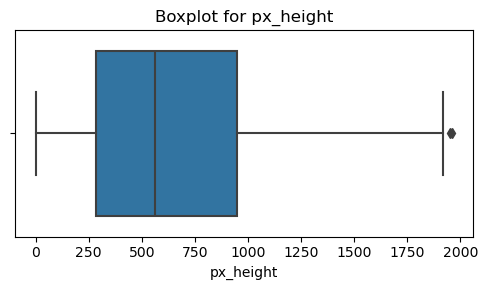

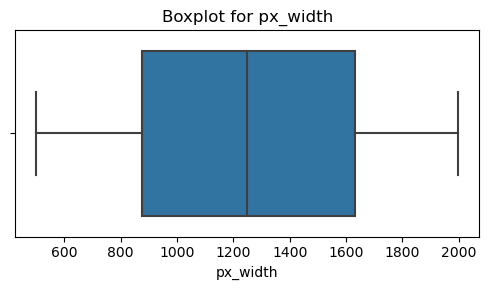

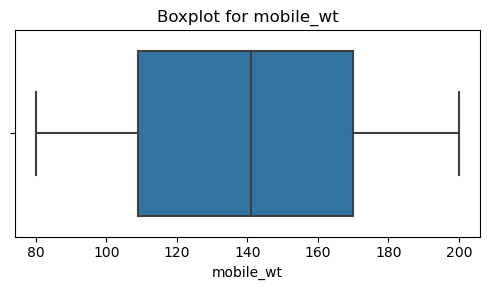

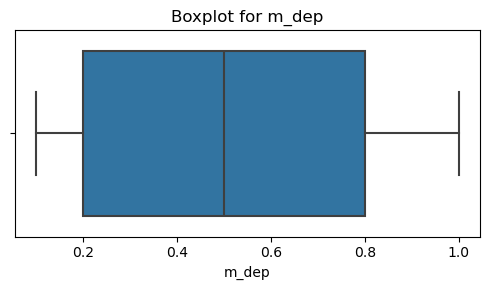

In [16]:
# List of numeric columns to visualize for outliers
numeric_columns = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'm_dep']

# Creating boxplots for each numeric column
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Observations
* There are outliers present in px_height features of the dataset.
* As these are all Numeric features and outliers are present so we will cap them later using IQR.

In [17]:
# Handling outliers using IQR capping
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outlier capping
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outlier capping
    
    # Capping outliers at the bounds
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    # Displaying bounds for each feature
    print(f"{col} - Lower bound: {lower_bound}, Upper bound: {upper_bound}")

print("Outliers have been capped using IQR for all numerical features.")


battery_power - Lower bound: -293.5, Upper bound: 2760.5
ram - Lower bound: -1578.0, Upper bound: 5850.0
px_height - Lower bound: -714.0, Upper bound: 1944.0
px_width - Lower bound: -262.625, Upper bound: 2770.375
mobile_wt - Lower bound: 17.5, Upper bound: 261.5
m_dep - Lower bound: -0.7000000000000002, Upper bound: 1.7000000000000002
Outliers have been capped using IQR for all numerical features.


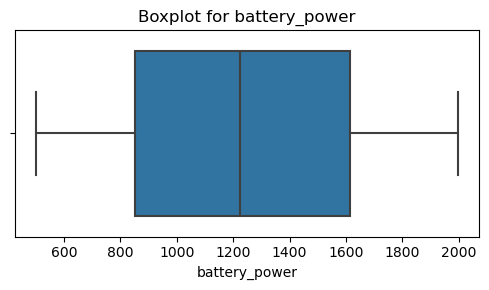

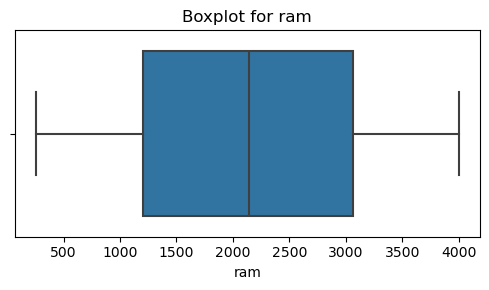

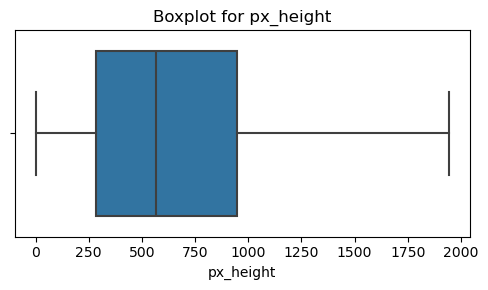

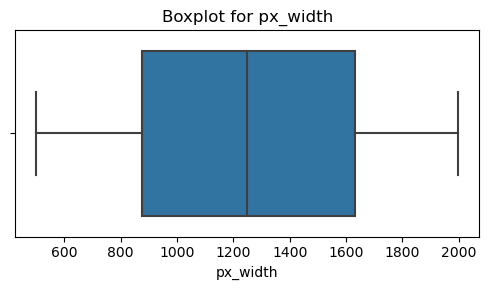

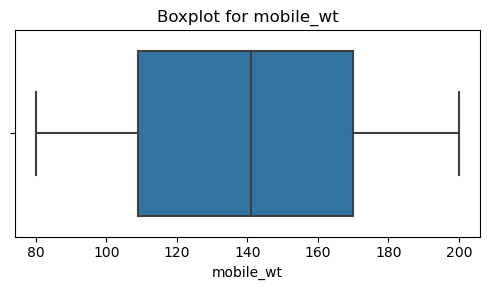

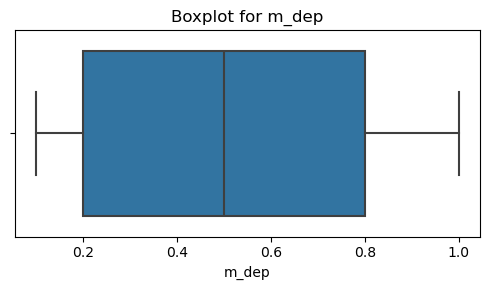

In [18]:
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Observations
* Here is a visual representation of each numeric column after capping the outliers

## Check for information of the features of the dataset after cleaning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 2. Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Task 6: Create visualizations to understand the distribution of numerical features (e.g., histograms, box plots).

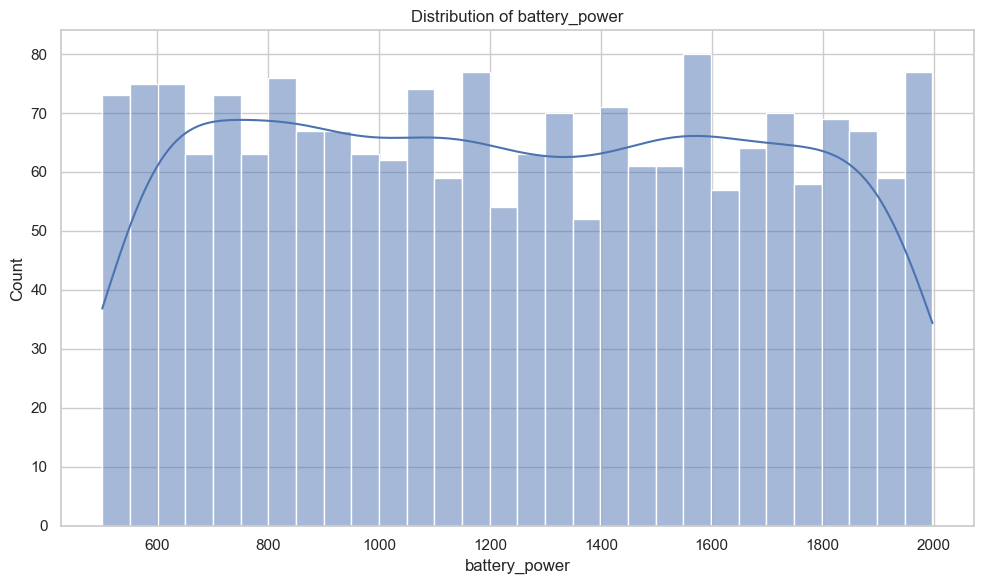

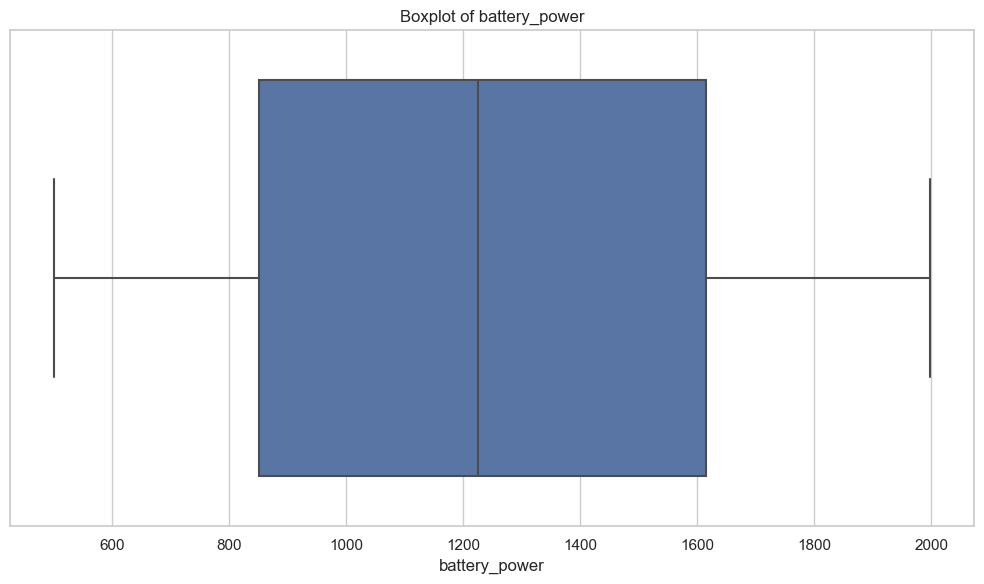

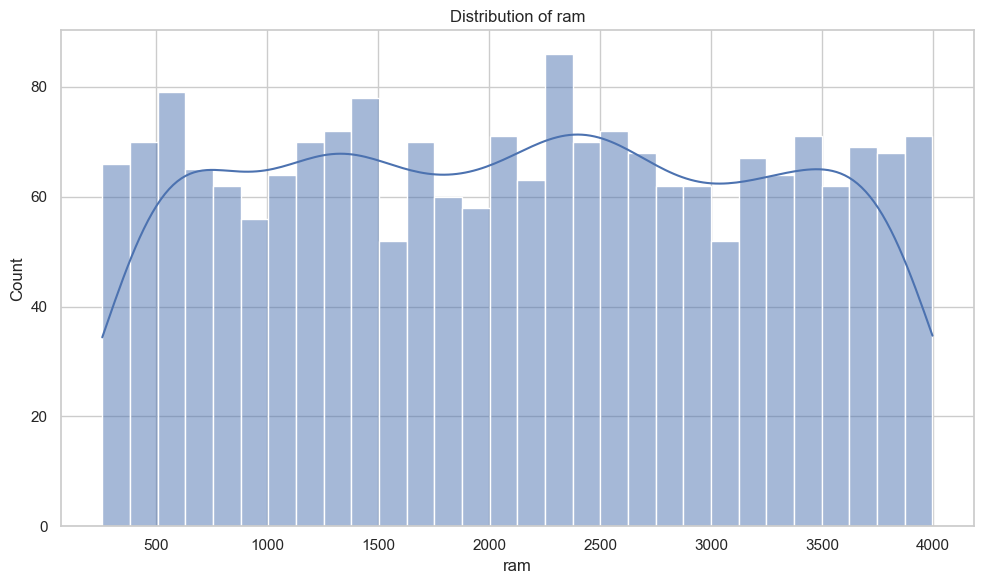

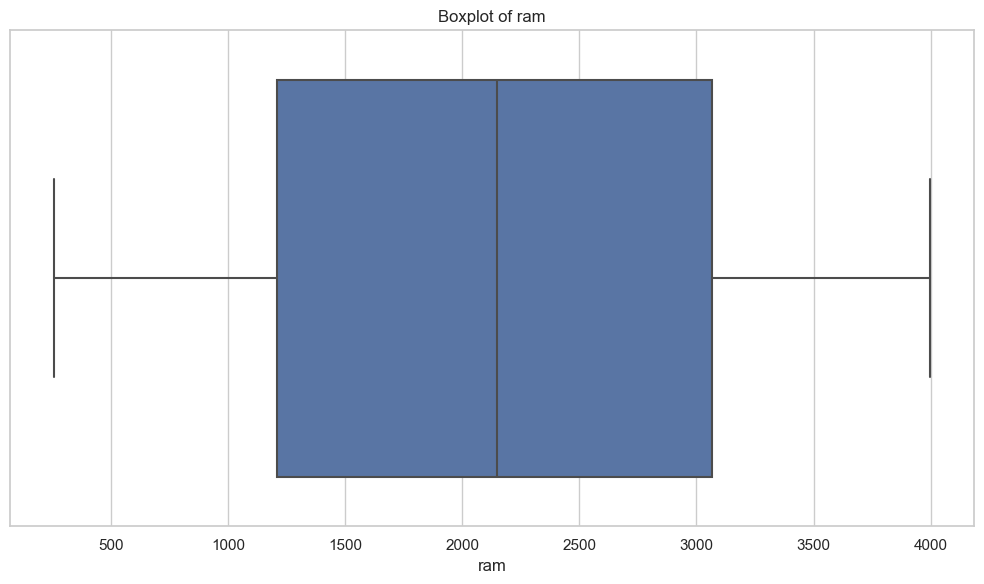

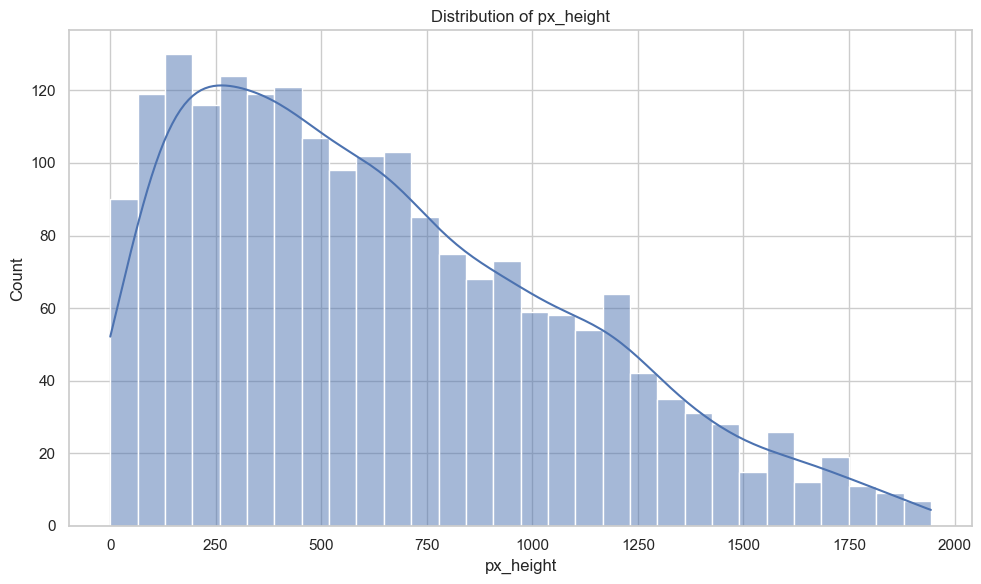

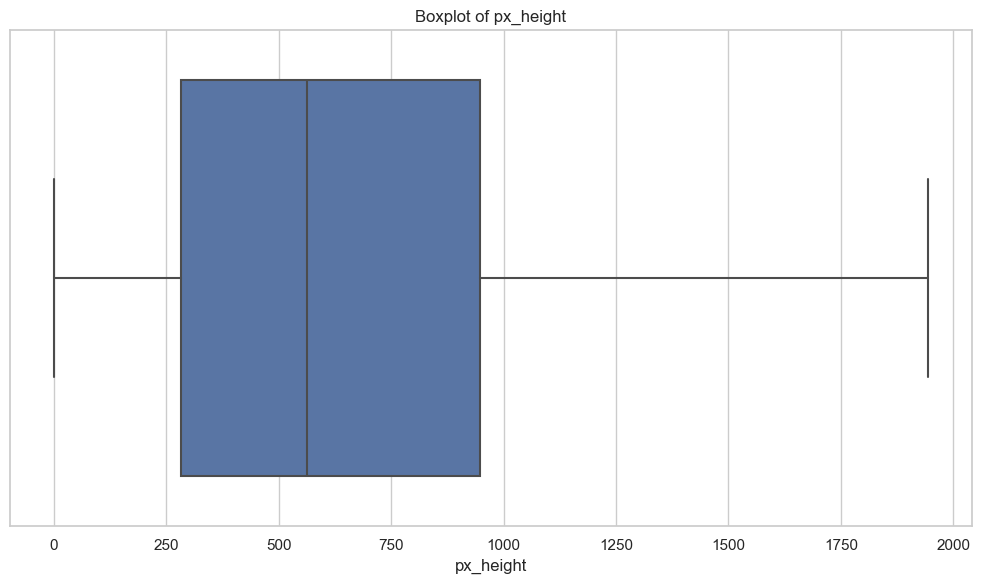

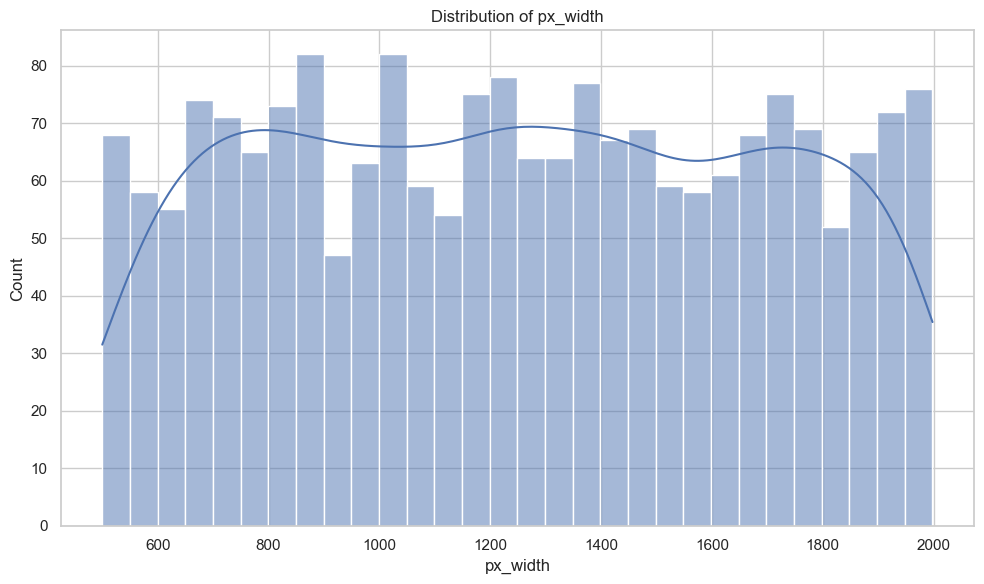

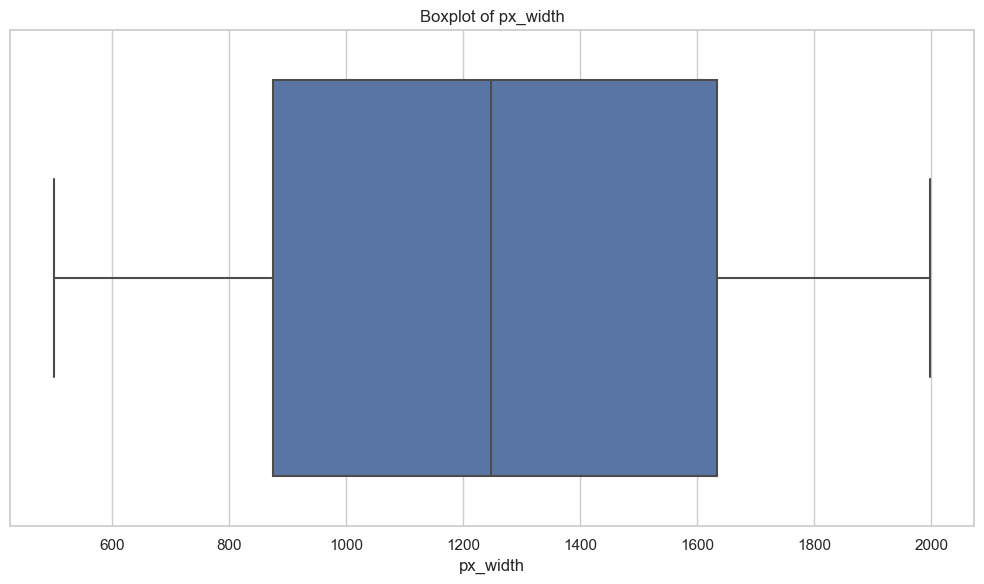

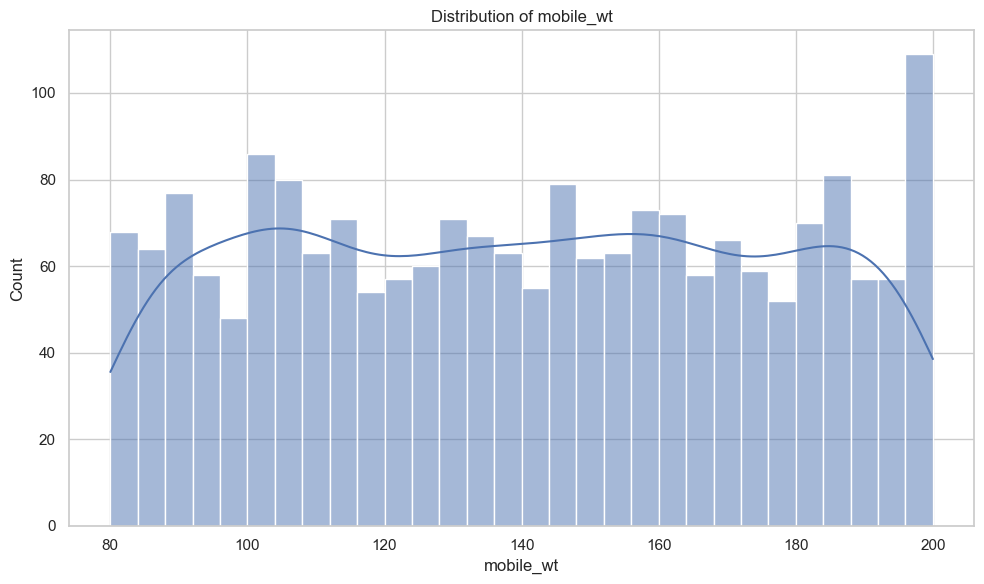

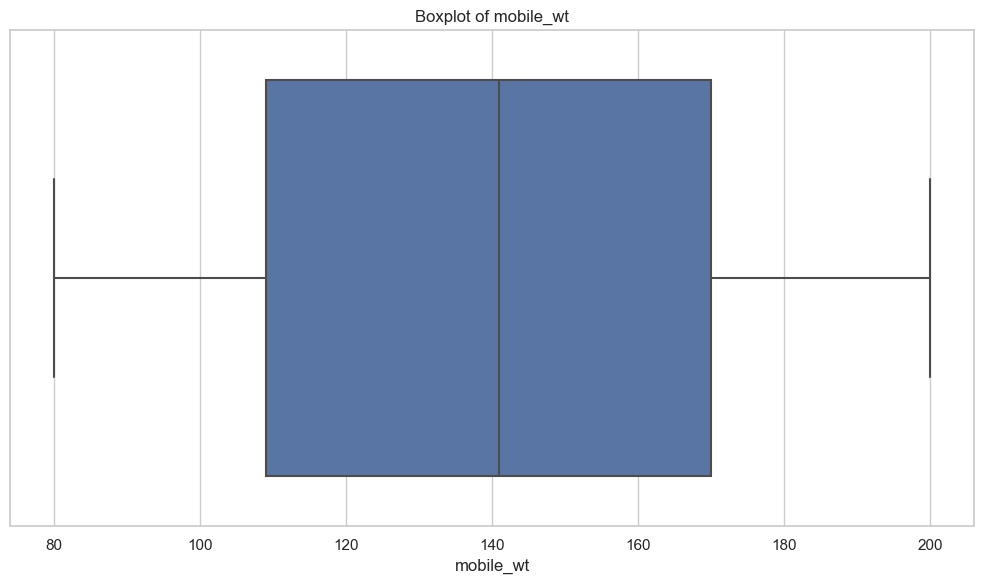

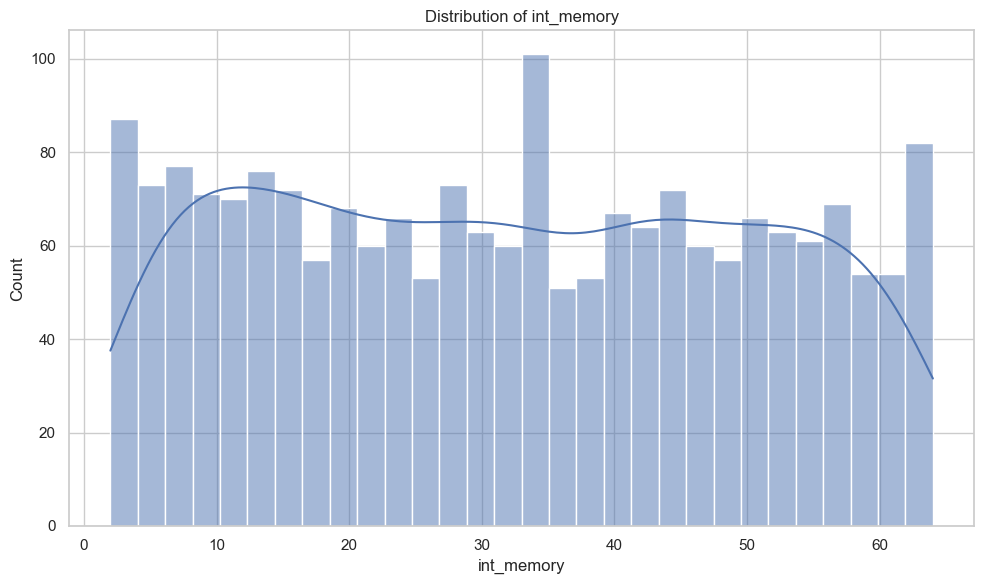

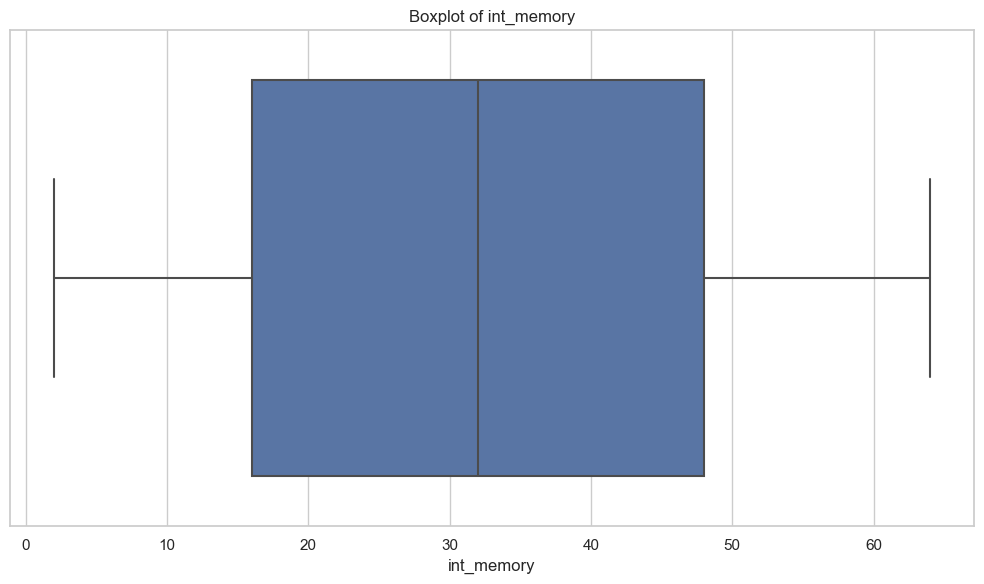

In [21]:
numeric_columns = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'int_memory']


for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


### Observations
1. battery_power
Distribution: Fairly uniform distribution across the range (500–2000 mAh), suggesting balanced battery values across devices.

Boxplot: No visible outliers. The values are well-spread, with a symmetric distribution.

2. ram
Distribution: Also appears roughly uniform across the dataset (256–3998 MB). Slight clustering toward mid-to-high range.

Boxplot: No extreme outliers. RAM is a key feature and seems to vary widely, which is good for modeling.

3. px_height
Distribution: Right-skewed (most values concentrated at the lower end), indicating many phones have relatively lower screen height resolution.

Boxplot: Some mild outliers on the higher end, but acceptable. Data is spread out over a wide range.

4. px_width
Distribution: Nearly uniform with slight density variations across the range (500–2000), balanced dataset in terms of horizontal resolution.

Boxplot: No strong outliers. Symmetric and well-distributed.

5. mobile_wt
Distribution: Fairly even distribution across 80g–200g, though minor peaks at extremes hint at popular light/heavy models.

Boxplot: No notable outliers. Median weight is around 140g.

6. int_memory
Distribution: Flat and uniform (1–64 GB). Suggests no dominant memory tier; dataset is balanced.

Boxplot: No outliers, and memory increases linearly. This will help the model distinguish price tiers.

Summary
No serious outliers or skewness issues (except px_height which is slightly skewed).

All variables appear to be good candidates for modeling, especially ram, battery_power, px_height, and px_width which likely contribute heavily to price classification.

### Task 8: Generate correlation heatmaps to identify relationships between numerical features.

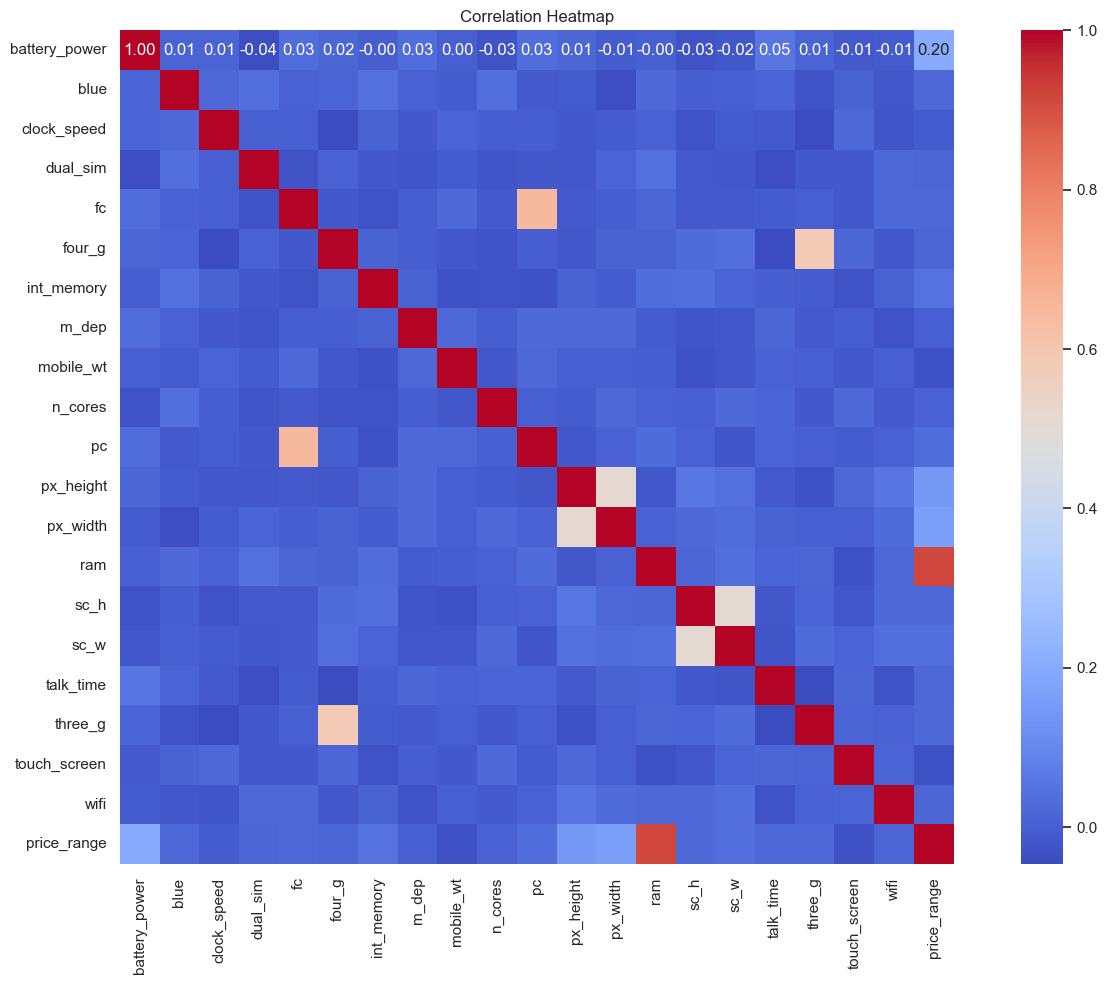

In [22]:
# Task 8: Correlation Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Observations
* Key Correlations with price_range (Target Variable):
ram (0.92) shows a very strong positive correlation with price_range. This indicates that higher RAM is closely associated with a higher price category, making it the most influential feature.

* battery_power (0.20) has a weak positive correlation with price_range, suggesting that battery capacity has some impact on the price range.

* px_height (0.15) and px_width (0.15) both show weak positive correlations with price_range. These together represent screen resolution, which can be a relevant factor for pricing.

* Features with Minimal or No Correlation:
Features such as blue, dual_sim, wifi, three_g, and touch_screen show near-zero correlation with price_range, indicating minimal direct impact on the pricing.

* Variables like mobile_wt, sc_h, sc_w, and talk_time also do not show any significant correlation.

* Inter-feature Correlations:
There is a strong positive correlation between px_height and px_width, which is expected as they jointly define screen resolution.

* sc_h and sc_w are moderately correlated, reflecting the proportionality in screen dimensions.

### Task 9: Use pair plots to visualize relationships between features.


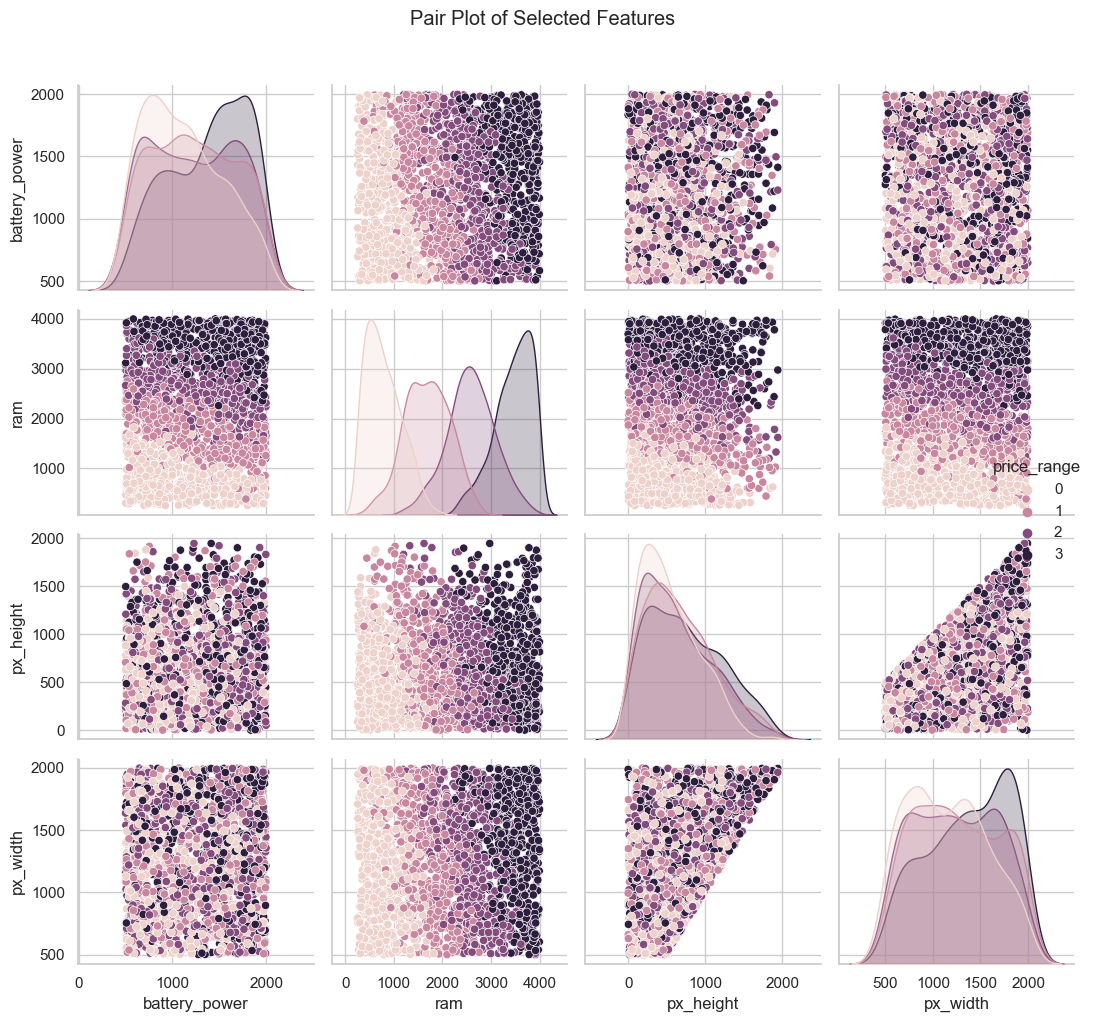

In [23]:
# Task 9: Pair Plot (sample of features to avoid overload)
sample_features = ['battery_power', 'ram', 'px_height', 'px_width', 'price_range']
sns.pairplot(df[sample_features], hue='price_range', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.tight_layout()
plt.show()

### Observations
1. RAM vs Price Range:

    There is a clear and strong separation between the price ranges.

    As RAM increases, the price category tends to move from 0 to 3.

    This confirms the high positive correlation observed in the heatmap.

2. Battery Power vs Price Range:

    Battery power also shows some separation across price categories, though less distinct than RAM.

    Higher battery capacity is generally associated with higher price ranges.

3. px_height and px_width vs Price Range:

    These features show a moderate pattern. Higher values are more likely to be associated with higher price ranges.

    However, the distinction between classes is not as sharp compared to RAM.

4. px_height vs px_width:

    A strong linear relationship exists, as expected (both define screen resolution).

    No strong separation between price categories within this plot.

5. General Trend:

    Among all features, RAM shows the clearest and most useful separation across price classes.

    Battery power comes next in importance, while screen dimensions are moderately informative.



# 3. Feature Engineering

### Task 10: Create new features that might be useful for the analysis (e.g., date-related features from timestamps, interaction terms).

In [24]:
# Create new features
df['pixel_area'] = df['px_height'] * df['px_width']
df['screen_area'] = df['sc_h'] * df['sc_w']
df['ppi_per_wt'] = df['pixel_area'] / df['mobile_wt']

# Display new features
print(df[['pixel_area', 'screen_area', 'ppi_per_wt']].head())


   pixel_area  screen_area    ppi_per_wt
0     15120.0           63     80.425532
1   1799140.0           51  13228.970588
2   2167308.0           22  14946.951724
3   2171776.0          128  16578.442748
4   1464096.0           16  10383.659574


### Observations
* The newly created features—pixel_area, screen_area, and ppi_per_wt—provide deeper insights into display quality and efficiency. These features capture the relationship between screen resolution, physical size, and mobile weight, which can help the model better distinguish between different price ranges.

### Task 11: Standardize or normalize numerical features if needed.

In [25]:
from sklearn.preprocessing import StandardScaler

# Choose numerical features (excluding target)
features_to_scale = df.drop(columns=['price_range']).select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display scaled values
print(df_scaled.head())


   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...      sc_h      sc_w  \
0   -1.380644  0.340740   1.349249 -1.101971  ... -0.784983  0.283103   
1    1.155024  0.687548  -0.120059 -0.664768  ...  1.114266 -0.635317   
2    0.493546  1.381165   0.134244  0.209639  ... -0.310171 -0.864922   
3   -1.215274  1.034357  -0.261339  0.646842  ...  0.876859  0.512708   
4    0.658915  0.340740   0.021220 -1.101971  ... -1.022389 -0.864922   

   talk_time   three_g  touch_screen      wifi  price_range  pixel_area  \
0   1.462493 -1.786861     -1.006018  0.986097 

### Observations

1. **Standardization Completed Successfully**  
   All numerical features, excluding the target variable (`price_range`), were standardized using `StandardScaler` from `sklearn.preprocessing`. This transformation ensures that each feature has a mean of 0 and a standard deviation of 1.

1. **Uniform Feature Scale**  
   Features such as `battery_power`, `mobile_wt`, `int_memory`, `talk_time`, and `screen_area`, which originally had different units and scales, are now on the same scale. This is crucial for distance-based algorithms (like KNN or SVM) and gradient-based models (like Logistic Regression).

1. **Target Variable Unchanged**  
   The `price_range` column was explicitly excluded from standardization since it's the target variable for prediction and should retain its original categorical values (e.g., 0 to 3 representing price categories).

1. **Impact on Model Training**  
   With features normalized, machine learning models will:
   - Train more efficiently.
   - Converge faster in optimization algorithms.
   - Produce more stable and consistent results, especially in algorithms sensitive to feature magnitudes.



# 4. Model Building

### Task 12: Split the dataset into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_scaled.drop(columns=['price_range'])  # scaled features
y = df_scaled['price_range']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Task 13: Train a simple linear regression model (if the task is regression) or a logistic regression model (if the task is classification).

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Observations
* Since it was a classification problem so we would use logistic regression.

### Task 14: Evaluate the model performance using appropriate metrics (e.g., RMSE for regression, accuracy/F1-score for classification).

In [48]:
# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.96      0.95      0.95       100
           3       0.97      0.99      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Confusion Matrix:
[[98  2  0  0]
 [ 1 96  3  0]
 [ 0  2 95  3]
 [ 0  0  1 99]]
Accuracy: 0.97


### Observations on Model Evaluation (Logistic Regression)

1. **High Overall Accuracy**  
   The Logistic Regression model achieved an accuracy of **97%**, indicating strong overall performance on the test dataset.

1. **Balanced Class Performance**  
   The model performs consistently well across all four `price_range` classes (0 to 3), with **precision, recall, and F1-scores all around or above 95%** for each class. This suggests that the classifier is not biased toward any particular class.

1. **Precision and Recall Details**  
   - **Class 0**: Very high precision (0.99) and recall (0.98), indicating minimal false positives and false negatives.  
   - **Class 1 & 2**: Slightly lower metrics (~0.95–0.96), but still strong performance.  
   - **Class 3**: Near-perfect recall (0.99), indicating that almost all instances of class 3 were correctly identified.

1. **Confusion Matrix Analysis**  
   - Most predictions are concentrated along the diagonal, confirming accurate classification.  
   - Minor misclassifications observed:  
     - 2 instances of Class 0 predicted as Class 1.  
     - 3 instances of Class 1 predicted as Class 2.  
     - 3 instances of Class 2 predicted as Class 3.  
     - 1 instance of Class 3 predicted as Class 2.  
   - No major class confusion, indicating the model distinguishes classes effectively.

1. **Macro and Weighted Averages**  
   Both **macro** and **weighted averages** of precision, recall, and F1-score are **0.97**, reinforcing that the model's performance is consistently strong across all classes.

1. **Model Suitability**  
   The results confirm that Logistic Regression is a suitable baseline model for this multiclass classification problem. The high metrics make it a strong candidate for deployment or comparison against more complex models.


### Task 15: Experiment with at least two other algorithms (e.g., decision tree, random forest, k-nearest neighbors) and compare their performance.


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.83      0.85      0.84       100
           2       0.85      0.82      0.83       100
           3       0.95      0.97      0.96       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Accuracy: 0.8975


### Observations

1. **Good Overall Accuracy**  
   The Random Forest model achieved an accuracy of **89.75%**, which is solid but slightly lower than Logistic Regression in this case.

1. **Class-Wise Performance Analysis**  
   - **Class 0** and **Class 3** had high performance with precision and recall both close to or above 95%.
   - **Class 1** and **Class 2** showed comparatively lower precision and recall (around 83–85%), indicating room for improvement in predicting mid-range price categories.

1. **Precision and Recall Details**  
   - **Class 0**: Precision = 0.97, Recall = 0.95  
   - **Class 1**: Precision = 0.83, Recall = 0.85  
   - **Class 2**: Precision = 0.85, Recall = 0.82  
   - **Class 3**: Precision = 0.95, Recall = 0.97  

1. **Balanced but Weaker Than Logistic Regression**  
   While the Random Forest model performs reasonably well overall, it underperforms compared to the Logistic Regression model, especially in classifying Class 1 and Class 2 instances.

1. **Macro and Weighted Averages**  
   The macro and weighted averages for precision, recall, and F1-score are all **0.90**, suggesting fairly balanced performance across classes, but with less precision than the logistic model.

1. **Model Interpretation**  
   The Random Forest model is capable of capturing non-linear relationships and interactions among features. However, in this case, it did not outperform the simpler Logistic Regression model. Tuning hyperparameters (e.g., number of trees, depth) may help improve performance.


In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn_model = KNeighborsClassifier()
knn_model.fi# Observations
* t(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

print("\nKNN Performance (Before Tuning):")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



KNN Performance (Before Tuning):
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       100
           1       0.34      0.41      0.37       100
           2       0.36      0.36      0.36       100
           3       0.68      0.52      0.59       100

    accuracy                           0.49       400
   macro avg       0.51      0.49      0.49       400
weighted avg       0.51      0.49      0.49       400

Accuracy: 0.4875


### Observations
1. **Low Overall Accuracy**  
   The KNN model achieved an accuracy of only **48.75%**, which is significantly lower compared to both Logistic Regression and Random Forest classifiers.

1. **Imbalanced Class-Wise Performance**  
   - **Class 0** and **Class 3** show relatively better results with F1-scores of 0.65 and 0.59, respectively.
   - **Class 1** and **Class 2** perform poorly, with F1-scores below 0.40, indicating the model struggles with mid-range price classes.

1. **Precision and Recall Breakdown**  
   - **Class 0**: Precision = 0.64, Recall = 0.66  
   - **Class 1**: Precision = 0.34, Recall = 0.41  
   - **Class 2**: Precision = 0.36, Recall = 0.36  
   - **Class 3**: Precision = 0.68, Recall = 0.52  

1. **Macro and Weighted Averages**  
   The macro average and weighted average for precision, recall, and F1-score are all approximately **0.49 to 0.51**, reflecting poor and inconsistent performance across all classes.

1. **Model Suitability**  
   In its default configuration, KNN is **not suitable** for this classification problem. The low accuracy suggests that:
   - KNN may be sensitive to feature scaling and the chosen number of neighbors (`n_neighbors`).
   - The default value (k=5) may not be optimal.



# 5. Model Tuning


### Task 16: Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_knn = {
    'n_neighbors': list(range(3, 21, 2)),  # odd values to avoid ties
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Initialize KNN
knn = KNeighborsClassifier()

# GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for KNN: {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}


### Observations on Model Evaluation (K-Nearest Neighbors - Before Tuning)

1. **Low Overall Accuracy**  
   The KNN model achieved an accuracy of only **48.75%**, which is significantly lower compared to both Logistic Regression and Random Forest classifiers.

1. **Imbalanced Class-Wise Performance**  
   - **Class 0** and **Class 3** show relatively better results with F1-scores of 0.65 and 0.59, respectively.
   - **Class 1** and **Class 2** perform poorly, with F1-scores below 0.40, indicating the model struggles with mid-range price classes.

1. **Precision and Recall Breakdown**  
   - **Class 0**: Precision = 0.64, Recall = 0.66  
   - **Class 1**: Precision = 0.34, Recall = 0.41  
   - **Class 2**: Precision = 0.36, Recall = 0.36  
   - **Class 3**: Precision = 0.68, Recall = 0.52  

1. **Macro and Weighted Averages**  
   The macro average and weighted average for precision, recall, and F1-score are all approximately **0.49 to 0.51**, reflecting poor and inconsistent performance across all classes.

1. **Model Suitability**  
   In its default configuration, KNN is **not suitable** for this classification problem. The low accuracy suggests that:
   - KNN may be sensitive to feature scaling and the chosen number of neighbors (`n_neighbors`).
   - The default value (k=5) may not be optimal.


### Task 17: Evaluate and compare the tuned models’ performance.

In [47]:
# Predict using tuned model
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate
print("\nTuned KNN Performance:")
print(classification_report(y_test, y_pred_best_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_best_knn))



Tuned KNN Performance:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.54      0.56      0.55       100
           2       0.54      0.54      0.54       100
           3       0.77      0.76      0.76       100

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400

Accuracy: 0.65


### Observations on Model Evaluation (Tuned K-Nearest Neighbors)

1. **Improved Overall Accuracy**  
   After tuning, the KNN model achieved an accuracy of **65%**, which is a significant improvement over the initial untuned model (which had 48.75% accuracy).

1. **Class-Wise Performance Gains**  
   - **Class 0** and **Class 3** show reasonable improvements, both achieving an F1-score of 0.75–0.76.
   - **Class 1** and **Class 2** still lag behind, with F1-scores around 0.54–0.55, indicating difficulty in correctly classifying mid-range price categories.

1. **Precision and Recall Breakdown**  
   - **Class 0**: Precision = 0.76, Recall = 0.74  
   - **Class 1**: Precision = 0.54, Recall = 0.56  
   - **Class 2**: Precision = 0.54, Recall = 0.54  
   - **Class 3**: Precision = 0.77, Recall = 0.76  

1. **Macro and Weighted Averages**  
   All macro and weighted averages for precision, recall, and F1-score are **0.65**, reflecting an overall balanced yet moderate performance.

1. **Effectiveness of Hyperparameter Tuning**  
   Tuning the `n_neighbors` parameter helped boost the model's predictive ability by approximately **16%**, confirming that proper hyperparameter selection plays a critical role in KNN performance.

1. **Comparison with Other Models**  
   Despite the improvement, the tuned KNN model still underperforms when compared to:
   - **Logistic Regression** (Accuracy: 97%)
   - **Random Forest** (Accuracy: 89.75%)

1. **Conclusion**  
   KNN, even after tuning, does not outperform simpler or more complex models on this dataset. It may be less suitable for this classification task, especially when higher accuracy and class-wise balance are desired.
